# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
data = pd.read_csv('Bank-data.csv')

In [4]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
data = data.set_index('Unnamed: 0')

In [6]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
Unnamed: 0,,,,,,,
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [7]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [8]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
Unnamed: 0,,,,,,,
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [16]:
y = data['y']
x = data[['interest_rate', 'credit', 'march', 'may', 'previous', 'duration']]

In [17]:
x.head()

,interest_rate,credit,march,may,previous,duration
Unnamed: 0,,,,,,
0,1.334,0.0,1.0,0.0,0.0,117.0
1,0.767,0.0,0.0,2.0,1.0,274.0
2,4.858,0.0,1.0,0.0,0.0,167.0
3,4.120,0.0,0.0,0.0,0.0,686.0
4,4.856,0.0,1.0,0.0,0.0,157.0


### Simple Logistic Regression

Run the regression.

In [19]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.336102
         Iterations 7


### Interpretation

In [20]:
results_log.summary()

# LLR p-value - measures if our model is statistically different from null
# 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:                  0.5151
Time:                        15:17:30   Log-Likelihood:                -174.10
converged:                       True   LL-Null:                       -359.05
                                        LLR p-value:                 9.078e-78
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
interest_rate    -0.7998      0.079    -10.180      0.000      -0.954      -0.646
credit            2.3241      1.072      2.169      0.030       0.224       4.424
march            -1.8497      0.316     -5.858      0.000      -2.469      -1.231
may               0.1579      0.210      0.752      0.452      -0.254       0.570
previous          1.2663      0.585      2.164      0.030       0.119       2.413
duration          0.0069      0.001     10.218      0.000       0.006       0.008
=================================================================================
"""

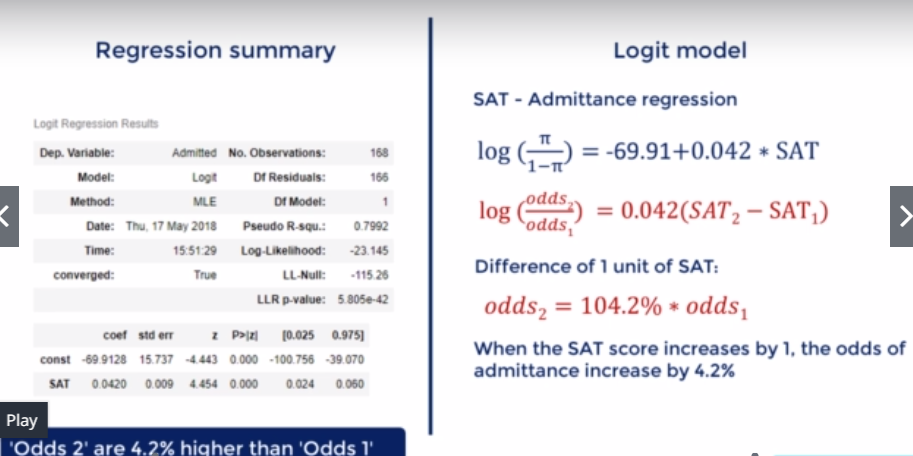